In [2]:
## CE 295 - Energy Systems and Control
# HW 1 : Battery Modeling, Analysis, and Control
# Oski Bear, SID 18681868
# Prof. Moura
# Due Date is written here

# BEAR_OSKI_HW1.ipynb
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline


fs = 15; # Font Size for plots

1. N/A

2. 

In recent decades the power sector has undergone large changes as deregulation has decreased the ubiquity of vertically integrated utilities, demand has grown, stability / reliabliity has decreased, and renewable generation has flourished. Combined with aging physical T&D infrastructure in the global north and a massive decrease in the cost of sensor, controls and communication hardware, there are massive opportunities for modeling and controls to address the challenges faced by the power sector. In the past the grid consisted of massively overbuilt systems where power flows top to bottom, demand is considered a uncontrolable input, and insights downstream of the generator / transmission are expensive. Today cheap sensing and controls hardware, combined with more sophisticaed modeling can allow to overcome such challenges. This allows us to push our existing infrastructure further, reduce costs for future infrastructure expenditures, and perhaps most importantly, allow for a more sophisticated grid that permits a massive expansion of renewable generation, storage and demand flexibility that will help lead to a full decarbonization of our energy system.

3. 
 - Black Box
   - Advantages
     - Uses data, not fundamental laws to derive the system
     - Useful if we dont understand 1st principles of the system
     - Very flexible
   - Disadvantages
     - Very sensitive to the data input
     - Hard to interpret
     - no guarantee of accuracy outside training data
 - White Box
   - Advantages
     - Uses mathmatical relationships that we've derived from fundamental laws (first principles)
     - Easy to manipulate
     - Interpretable
     - Can be developed while the physical system is still being planned or otherwise cannot be directly observed
   - Disadvantages
     - Limited ability to capture anomolies
     - requires 1st principles understanding of a system to use


4.  

 - Analysis
   - Given known inputs and states, what will the output of the model be at some given time? I.e. Simulation
 - State Estimation
   - Given historical inputs and outputs, estimate what the states may be
 - System Design / Planning
   - Given some input and a desired output, estimate the model needed to achieve the desired output
 - Model Identification
   - Given historical input and historical outputs learn the model that is consistent with these historical inputs and outputs.
 - Control Synthesis
   - Given some system with a known current state and some desired output, find the inputs that will cause the model to produce the desired output.


5. 
 - A: List the “stocks” in this model. That is, what are the states? 
   - z
   - V_c
 - B:  Use Kirchoﬀ’s voltage and current laws to derive the system equations. Include the resulting equations and integrator dynamics in your report.
  - z_dot
    - $\frac{dz}{dt} = \frac{1}{Q} * I(t)$
  - V_c_dot
    - $\frac{dV_c}{dt} = I(t) - \frac{\frac{V_c}{R_2}}{C}$ -> $\frac{dV_c}{dt} = \frac{1}{C} * I(t) - \frac{V_c}{C * R_2}$
  - Output function 
    - $V = OCV(z) - IR_1 - V_c$
 - C: List all the parameters, θ, of the model.
    - R_1
    - R_2
    - C
    - Q

 - D: Consider current I as the controllable input, and voltage V as the measurable output. Reformulate the model into a state-space form, as discussed in class. You should have multiple state equations and one output equation.

$$
\frac{d}{dt}
\begin{bmatrix} z \\ V_{c} \end{bmatrix} 
= 
\begin{bmatrix} 0 & 0 \\ 0 & -\frac{1}{R_{2}C} \end{bmatrix} 
\begin{bmatrix} z \\ V_{c} \end{bmatrix} 
+
\begin{bmatrix} \frac{1}{Q} \\ \frac{1}{C} \end{bmatrix} I(t)
$$

- E: We know that everything except OCZ() is linear. However, we dont know the form of OCZ(), but in the section below it suggests that OCZ() is a quadradic function. In this case, it doesnt not have a linear output.
 

6. 
 - A: Marginally Stable
 - B: Linearize:
   - $V(t) = ocv(z) + (I * R_1) + V_c$ -> $ p_0 + (p_1*z) + (p_2*z^{2}) + (p_3 * z^{3}) + (I * R) + V_{c})$
   - 0th Order: $ p_0 + (p_1*z_{eq}) + (p_2*z_{eq}^{2}) + (p_3 * z_{eq}^{3})  + (I_{eq} * R_1) + V_{c}^{eq}$ -> $ p_0 + (p_1*z_{eq}) + (p_2*z_{eq}^{2}) + (p_3 * z_{eq}^{3})  + (0 * R_1) + 0$
   - 1st Order w/ respect to z: $[p_1 + (2 * p_2 * z^{eq}) +(3 * p_2 * (z^{eq})^{2}) ][z(t) - z^{eq}]$
   - 1st Order w/ respect to I: $[R_1][I(t) - I^{eq}]$
   - 1st Order w/ respect to V_c: $[1][V_c(t) - V_c^{eq}]$

   with z_eq = 0.5, V_c^eq = 0, and I_eq = 0:

   $V = p_0 + 0.5p_1 + 0.25p_2 + 0.125p_3 + [p_1 + p_2 + 0.75p_3] * [z-0.5] - [R_1] * [I] * [V_c]$

7.

- A: The linearized model incurs errors because of the location where we linearized the function. The OCV vs SOC plot shows that the function is clearly not linear. However, near 0.50, it is relatively flat and linear. Thus our linearized function should perform well near our equilibrium point of 0.50, but as you move further away from this point it will become less and less accurate. 


[0.         0.04166667 0.08333333 0.125      0.16666667 0.20833333
 0.25       0.29166667 0.33333333 0.375      0.41666667 0.45833333
 0.5        0.54166667 0.58333333 0.625      0.66666667 0.70833333
 0.75       0.79166667 0.83333333 0.875      0.91666667 0.95833333
 1.        ]
[3.4707     3.53339386 3.58770573 3.63438105 3.67416528 3.70780384
 3.73604219 3.75962576 3.7793     3.79581035 3.80990226 3.82232116
 3.8338125  3.84512172 3.85699427 3.87017559 3.88541111 3.90344629
 3.92502656 3.95089737 3.98180417 4.01849238 4.06170747 4.11219486
 4.1707    ]


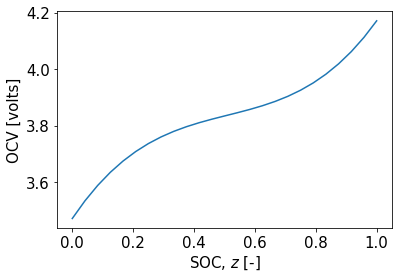

In [3]:
## Part(a): Model Parameters

# ECM Model Parameters
Q  = 3600  # [Coulombs]
R1 = 0.05  # [Ohms]
R2 = 0.005 # [Ohms]
C  = 500   # [Farads]

# OCV polynomial coefficients
p_0 = 3.4707
p_1 = 1.6112
p_2 = -2.6287
p_3 = 1.7175

# Plot nonlinear OCV function
z_vec = np.linspace(0,1,25)
OCV   = p_0 + (p_1*z_vec) + (p_2*(z_vec**2)) + (p_3*(z_vec**3))
print(z_vec)
print(OCV)

plt.plot(z_vec,OCV)
plt.xlabel('SOC, $z$ [-]',fontsize=fs)
plt.ylabel('OCV [volts]',fontsize=fs)
plt.tick_params(axis='both', which='major', labelsize=fs)
plt.show()

In [22]:
## Part(b): Simulate

# Assemble (A,B) state-space matrices
A = np.array([[0,0], [0,-1/(R2*C)]])
B = np.array([[1/Q], [1/C]]) ##Did I just miss this? 
print(A)
print(B)

C_dummy = np.array([[0, 0]])
D_dummy = np.array([[0]])
print(C_dummy)
print(D_dummy)

# Create state-space model
sys = signal.lti(A,B,C_dummy,D_dummy)

# Create time vector
DeltaT = 1 # Time step size [sec]
t = np.arange(0,10*60,DeltaT)   # Total Simulation time (min*sec/min)
#print('time')
#print(t)

# Input current signals
#print(np.shape(t))
Current = np.zeros_like(t)*0
for k in range(0, len(Current)):
    if (t[k] % 40) < 20:
        Current[k] = -5

# Initial Conditions
z0 = 0.5 # state-of-charge
V_c0 = 0 # capacitor voltage
x0 = [z0,V_c0] # np.array([[z0],[V_c0]])   # Vectorize initial conditions
print('x0')
print(x0)

print(np.shape(x0))
print(np.shape(Current))
print(np.shape(t))

# Simulate linear dynamics (Read documentation on scipy.signal.lsim)
tsim, y, x = signal.lsim2(sys,Current,t,x0)

[[ 0.   0. ]
 [ 0.  -0.4]]
[[0.00027778]
 [0.002     ]]
[[0 0]]
[0]
x0
[0.5, 0]
(2,)
(600,)
(600,)


In [39]:
# Parse out states
z = x[:,0]
V_c = x[:,1]

# Compute nonlinear output function

V_nl = p_0 + (p_1*z) + (p_2*(z**2)) + (p_3*(z**3)) - (Current*R1) - V_c

### Compute linearized output function
# Linearization Points
zeq   = 0.5 # state-of-charge
V_ceq = 0   # capacitor voltage
Ieq   = 0   # Current

V_lin = (p_1 + p_2 + .75*p_3)*(z-zeq) + p_0 + p_1*zeq + p_2*(zeq**2) + p_3*(zeq**3) -(V_c - V_ceq) - R1*(Current - Ieq)

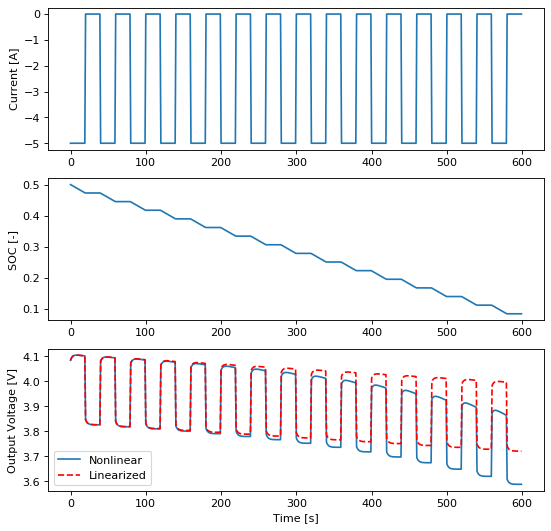

In [41]:
## Part(b): Plot results

# Current
plt.figure(num=2, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(3, 1, 1)
plt.plot(t,Current)
plt.ylabel('Current [A]')

# State-of-charge
plt.subplot(3, 1, 2)
plt.plot(t,z)
plt.ylabel('SOC [-]')

# Nonlinear and linearized voltage
plt.subplot(3, 1, 3)
plt.plot(t, V_nl,label="Nonlinear")
plt.plot(t, V_lin, 'r--', label="Linearized")
plt.ylabel('Output Voltage [V]')
plt.xlabel('Time [s]')
plt.legend( )

plt.show()

In [37]:
x

array([[ 5.00000000e-01,  0.00000000e+00],
       [ 4.98611111e-01, -8.24199007e-03],
       [ 4.97222222e-01, -1.37667908e-02],
       ...,
       [ 8.40277756e-02, -2.29431338e-05],
       [ 8.40277756e-02, -1.53786542e-05],
       [ 8.40277756e-02, -1.03085308e-05]])